In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer-risk-factors.csv to cancer-risk-factors (9).csv


In [ ]:
import pandas as pd

df = pd.read_csv("cancer-risk-factors.csv")

# Caractérisation des données

In [ ]:
df.shape

(2000, 21)

# Vérification si il y a des valeurs nulles

In [ ]:
df.isnull().sum()

,0
Patient_ID,0
Cancer_Type,0
Age,0
Gender,0
Smoking,0
Alcohol_Use,0
Obesity,0
Family_History,0
Diet_Red_Meat,0
Diet_Salted_Processed,0


Il n'y a pas de valeur nulle

# Vérification si il y a des doublons dans le jeu de données

In [ ]:
df.duplicated().sum()

np.int64(0)

il n'y a pas de doublon et de valeur nulle je peux donc utiliser le jeu de données

# Visualisation du jeux de données

In [ ]:
display(df.head(5))

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium


# Suppression de la colonne patient ID anonimisée qui n'apporte pas d'information spécifique pour le traitement des données

In [ ]:
df = df.drop('Patient_ID', axis=1)

# Sélection uniquement des données sur le cancer du sein (Breast)

In [ ]:
df = df[df['Cancer_Type'] == 'Breast'].copy()

# Vérification du résultat

In [ ]:
display(df.head(5))

,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,Breast,68,0,7,2,8,0,5,3,7,4,6,3,1,0,0,0.398696,28.0,5,Medium
16,Breast,67,0,7,7,7,0,2,8,10,1,7,9,0,0,2,0.520842,21.9,1,Medium
18,Breast,66,0,10,6,8,0,1,4,1,5,8,10,0,0,4,0.591500,22.4,9,Medium
19,Breast,58,0,2,10,7,0,10,3,4,2,7,2,0,0,0,0.529895,20.4,7,Medium
22,Breast,64,0,7,7,10,1,0,0,1,2,9,0,0,0,2,0.403662,26.3,2,Medium


# Visualisation des 3 classes de risque du cancer du sein

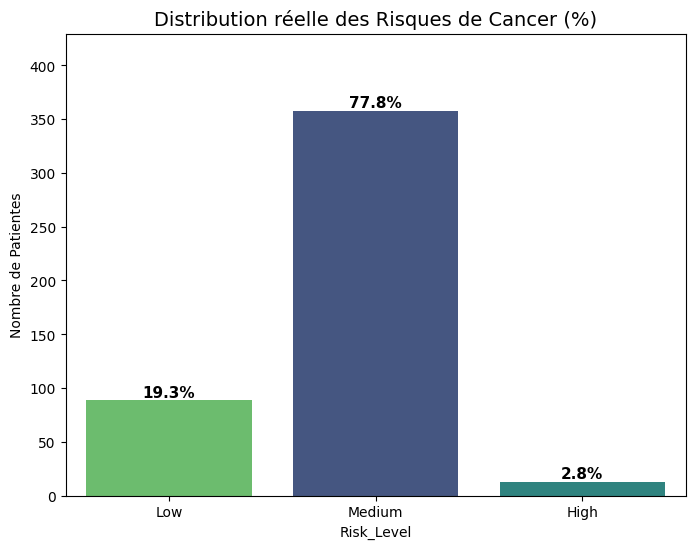

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcul des pourcentages
# On force l'ordre ici pour correspondre au futur graphique
risk_order = ['Low', 'Medium', 'High']
counts = df['Risk_Level'].value_counts(normalize=True) * 100

# 2. Création du graphique
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Risk_Level', order=risk_order, hue='Risk_Level', palette='viridis', legend=False)

# 3. Ajout des %

# On récupère le nombre total de lignes dans le tableau
total = len(df)

# Pour chaque barre (p) générée dans le graphique
for p in ax.patches:
    # 1. On calcule le pourcentage (hauteur de la barre / total * 100)
    pourcentage = f"{(100 * p.get_height() / total):.1f}%"

    # 2. On récupère la position X (gauche) et Y (sommet) de la barre
    x = p.get_x() + p.get_width() / 2  # Le milieu de la barre
    y = p.get_height()                 # Le haut de la barre

    # 3. On écrit le texte sur le graphique
    ax.annotate(pourcentage, (x, y), ha='center', va='bottom', fontweight='bold', size=11)

# 4. Habillage
plt.title("Distribution réelle des Risques de Cancer (%)", fontsize=14)
plt.ylabel("Nombre de Patientes")
plt.ylim(0, df['Risk_Level'].value_counts().max() * 1.2) # Plus d'espace en haut
plt.show()

In [ ]:
# 1. On compte le nombre de patientes par catégorie
nombre = df['Risk_Level'].value_counts()

# 2. On calcule le pourcentage (normalize=True donne un chiffre entre 0 et 1)
pourcentage = df['Risk_Level'].value_counts(normalize=True) * 100

# 3. On crée le tableau final en donnant un nom à chaque colonne
tableau_bilan = pd.DataFrame({
    'Effectif': nombre,
    'Proportion (%)': pourcentage
})

# 4. On remet les lignes dans l'ordre logique (Low, Medium, High)
ordre_logique = ['Low', 'Medium', 'High']
tableau_final = tableau_bilan.reindex(ordre_logique)

# 5. On affiche le résultat
print(tableau_final)

            Effectif  Proportion (%)
Risk_Level                          
Low               89       19.347826
Medium           358       77.826087
High              13        2.826087


**Il y a un déséquilibre des données**

*   La grande majorité des sujets étudiés se situent dans une zone de risque modéré.
*   Pour le machine learning le modèle sera excellent pour reconnaître le risque Medium.
*   Le modèle risque d'ignorer ou de mal prédire le risque High (faux négatifs) car il n'a pas assez d'exemples pour apprendre les caractéristiques spécifiques de ce groupe









# Préparation et pré-traitement des données

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# 1 On crée une nouvelle variable x qui contient toutes les informations des patientes (âge, calcium, tabac, etc.), mais on retire les colonnes qui "donnent la réponse" à savoir Risk_level et Cancer_Type.
X = df.drop(['Risk_Level', 'Cancer_Type'], axis=1).values

# 2  On prend la colonne des résultats (Risk_Level) et on traduit les mots en chiffres grâce à la fonction map.
y = df['Risk_Level'].map({'Low': 0, 'Medium': 1, 'High': 2}).values

# 3. On prépare les groupes : 80% pour l'entraînement et 20% des données pour le test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Normalisation mise à l'échelle de toutes les mesures
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 4. On transforme les réponses en vecteurs (via le One-Hot encoding) ce qui permet de faire des choix entre les 3 catégories
Y_train = to_categorical(y_train, 3)
Y_val = to_categorical(y_val, 3)

# Construction et entraînement du réseau de neurones

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Initialisation du modèle
model = Sequential()

# Couche d'entrée et première couche cachée
# relu (Rectified Linear Unit) si l'information est négative (ou nulle) : Elle est bloquée (transformée en 0). Le neurone s'éteint car l'information n'est pas jugée pertinente.
# si l'information est positive : elle passe telle quelle, sans être modifiée
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Régularisation pour limiter le sur-apprentissage
model.add(Dropout(0.2))

# Deuxième couche cachée
model.add(Dense(32, activation='relu'))

# Couche de sortie (3 neurones pour 3 classes)
# Softmax permet d'avoir une somme des probabilités égale à 1
model.add(Dense(3, activation='softmax'))

# L'optimiseur ADAM commence par de grands pas pour apprendre vite, puis ralentit quand il approche de la solution pour être extrêmement précis
# loss='categorical_crossentropy'mesure l'écart entre la prédiction et la réalité
# metrics=['accuracy'] mesure e pourcentage de bonnes réponses.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# EarlyStopping permet d'éviter le sur-apprentissage (overfitting) si le modèle ne progresse plus
# monitor='val_loss'le modèle regarde l'erreur sur les données de validation
# Si la perte sur le jeu d'entraînement descend mais que la val_loss commence à remonter le modèle entre en overfitting alors l'algorithme arrête l'entraînement pour préserver la capacité du modèle à généraliser sur de nouvelles données.
# patience=10 : Définit un seuil de tolérance de 10 époques. Si aucune amélioration de la val_loss n'est enregistrée après 10 cycles consécutifs, l'entraînement est interrompu pour éviter tout calcul inutile et prévenir la dégradation du modèle.
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Démarrage de l'entraînement
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Sauvegarde du modèle
model.save('cancer_risk_model.h5')


# Récapitulatif de l'architecture modèle
model.summary()

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3377 - loss: 1.0358 - val_accuracy: 0.6957 - val_loss: 0.7838
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7335 - loss: 0.6999 - val_accuracy: 0.8152 - val_loss: 0.6385
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8092 - loss: 0.5785 - val_accuracy: 0.8043 - val_loss: 0.5822
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7978 - loss: 0.5116 - val_accuracy: 0.8152 - val_loss: 0.5458
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8180 - loss: 0.4675 - val_accuracy: 0.8370 - val_loss: 0.5104
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8225 - loss: 0.4682 - val_accuracy: 0.8478 - val_loss: 0.4785
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8692 - loss: 0.4260 - val_accuracy: 0.8587 - val_loss: 0.4527
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8654 - loss: 0.3817 - val_accuracy: 0.8478 - val_loss: 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

# Évaluation des performances et analyse du modèle

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


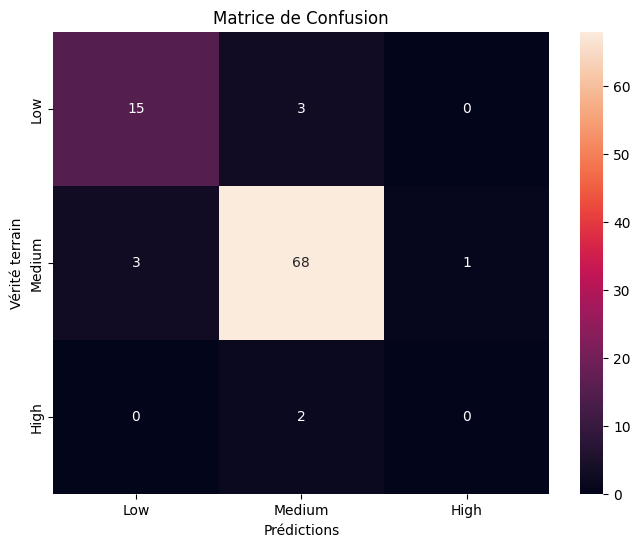


Rapport de Classification :
              precision    recall  f1-score   support

         Low       0.83      0.83      0.83        18
      Medium       0.93      0.94      0.94        72
        High       0.00      0.00      0.00         2

    accuracy                           0.90        92
   macro avg       0.59      0.59      0.59        92
weighted avg       0.89      0.90      0.90        92



In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# On redéfinit le dictionnaire pour que le code sache que 0=Low, 1=Medium, 2=High
mapping = {'Low': 0, 'Medium': 1, 'High': 2}

# Prédiction sur les données de validation
Y_pred_prob = model.predict(X_val)
# On prend l'indice de la probabilité maximum
Y_pred = np.argmax(Y_pred_prob, axis=1)
Y_true = np.argmax(Y_val, axis=1)

# Matrice de confusion
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_true, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=mapping.keys(), yticklabels=mapping.keys())
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Calcul des métriques (Accuracy, Précision, Recall, F1-score)
print("\nRapport de Classification :")
print(classification_report(Y_true, Y_pred, target_names=mapping.keys(),
                            zero_division=0))

# Le modèle précis mais aveugle aux cas critiques
*   Le modèle affiche une excellente précision globale (90%), mais cache un défaut majeur pour une application médicale : l'incapacité totale à détecter le risque élevé (High).
*   Le problème vient du faible nombre d'exemples pour la classe High (seulement 2 cas sur 92). Le modèle n'a pas eu assez de "matière" pour apprendre les caractéristiques spécifiques de ce groupe.

#Le modèle ne peut pas être déployé en l'état car il présente un risque de sécurité présence de faux négatifs sur les cas graves.


# Analyse de l'Influence des Facteurs

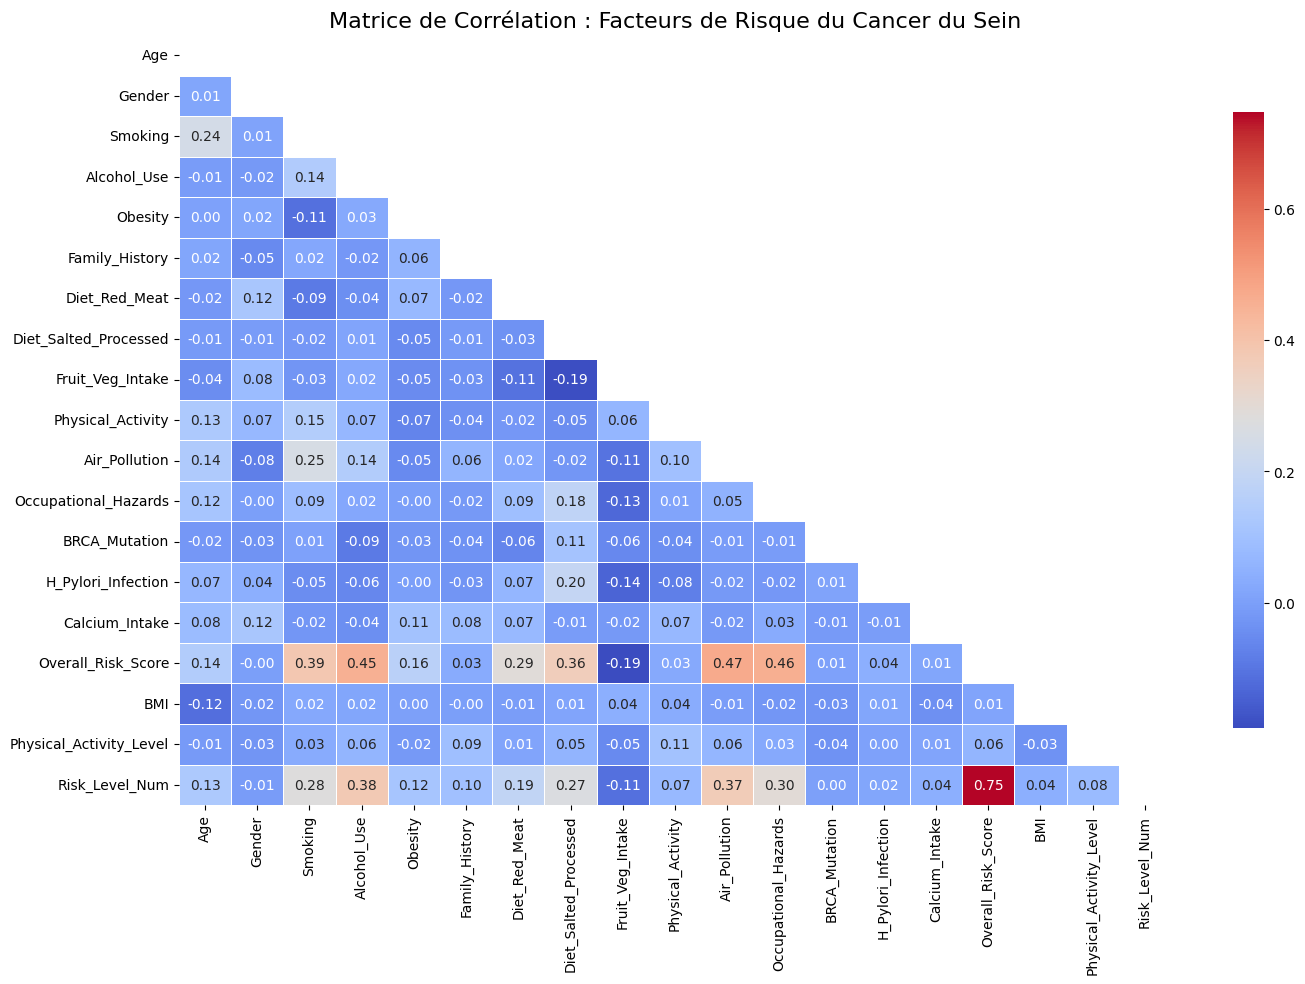


Facteurs les plus corrélés au niveau de risque :
Risk_Level_Num             1.000000
Overall_Risk_Score         0.747418
Alcohol_Use                0.378765
Air_Pollution              0.368133
Occupational_Hazards       0.295062
Smoking                    0.281647
Diet_Salted_Processed      0.269089
Diet_Red_Meat              0.187781
Age                        0.128623
Obesity                    0.115893
Family_History             0.096999
Physical_Activity_Level    0.079298
Physical_Activity          0.074996
BMI                        0.041070
Calcium_Intake             0.040385
H_Pylori_Infection         0.017713
BRCA_Mutation              0.002049
Gender                    -0.008269
Fruit_Veg_Intake          -0.112094
Name: Risk_Level_Num, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Préparation des données
df_corr = df.copy()

# On convertit le Risk_Level en valeurs numériques pour la corrélation
mapping_risk = {'Low': 0, 'Medium': 1, 'High': 2}
df_corr['Risk_Level_Num'] = df_corr['Risk_Level'].map(mapping_risk)

# On filtre pour ne garder que les colonnes numériques
# On exclut Cancer_Type car c'est toujours "Breast"
df_numeric = df_corr.select_dtypes(include=[np.number])

# 2. Calcul de la matrice de corrélation
# La méthode de Pearson mesure la force du lien entre deux variables
matrix = df_numeric.corr()

# 3. Création de la Heatmap
plt.figure(figsize=(16, 10))

# On crée un masque pour masquer la partie supérieure (miroir) et alléger le graphique
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(matrix,
            mask=mask,
            annot=True,           # Affiche les chiffres de corrélation
            fmt=".2f",            # 2 chiffres après la virgule
            cmap='coolwarm',      # Rouge = forte corrélation, Bleu = inverse
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title("Matrice de Corrélation : Facteurs de Risque du Cancer du Sein", fontsize=16)
plt.show()

# 4. Affichage du top des facteurs influençant le risque
print("\nFacteurs les plus corrélés au niveau de risque :")
print(matrix['Risk_Level_Num'].sort_values(ascending=False))

# Bien que la matrice de corrélation souligne l'influence des facteurs environnementaux (Alcool, Pollution) :


*   Elle reste un outil limité.
*    Elle ne détecte pas les interactions complexes entre les gènes et le mode de vie.
*   Elle tend à masquer les signaux des cas les plus graves (High) en raison de leur faible nombre.






# Autre piste à tester :

*   L'analyse du modèle actuel affiche une précision globale de 91 %, ce qui
semble satisfaisant au premier abord.

*  Cependant, le rapport de classification révèle une faiblesse majeure pour une application médicale : le modèle échoue totalement à détecter le risque élevé, avec un rappel (recall) de 0.00 pour la classe "High".


*  Ce problème découle d'un fort déséquilibre des données : avec 72 cas "Medium" contre seulement 2 cas "High", l'algorithme a naturellement tendance à ignorer la catégorie minoritaire pour maximiser son score de réussite sur la majorité.

# Pour corriger ce biais je vais implémenter une stratégie d'équilibrage des classes par calcul de poids selon les standards de TensorFlow.

référence :

*   https://www.tensorflow.org/tutorials/structured_data/imbalanced_data







# Équilibrage des classes par calcul de poids

In [ ]:
import numpy as np
from sklearn.utils import class_weight


# class_weight='balanced' : cette option calcule automatiquement des poids inversement proportionnels à la fréquence des classes. Plus une catégorie est petite, plus son poids devient grand.
weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
    )
#la fonction prend la liste de poids et lui ajoute automatiquement un compteur
dict_weights = dict(enumerate(weights))

print("Poids attribués par classe :")
print(dict_weights)

Poids attribués par classe :
{0: np.float64(1.727699530516432), 1: np.float64(0.4289044289044289), 2: np.float64(11.151515151515152)}


# Ré-entraînement et validation du modèle avec pondération des classes

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 4.0606e-04 - val_accuracy: 0.9239 - val_loss: 0.6667
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.8660e-04 - val_accuracy: 0.9239 - val_loss: 0.6638
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.7546e-04 - val_accuracy: 0.9239 - val_loss: 0.6597
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 7.0196e-04 - val_accuracy: 0.9239 - val_loss: 0.6591
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 7.8720e-04 - val_accuracy: 0.9239 - val_loss: 0.6679
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.9939e-04 - val_accuracy: 0.9239 - val_loss: 0.6758
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9959 - loss: 0.0029 - val_accuracy: 0.9130 - val_loss: 0.6911
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 4.3003e-0

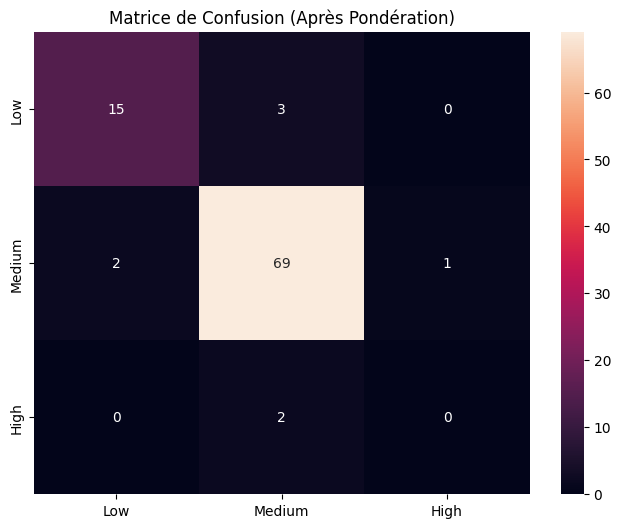


Rapport de Classification :
              precision    recall  f1-score   support

         Low       0.88      0.83      0.86        18
      Medium       0.93      0.96      0.95        72
        High       0.00      0.00      0.00         2

    accuracy                           0.91        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.90      0.91      0.91        92



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
# Relance l'entraînement avec les poids calculés
history = model.fit(
    X_train,
    Y_train,
    validation_data=(X_val, Y_val),
    epochs=100,
    class_weight=dict_weights, # Applique les poids : {0: np.float64(1.727699530516432), 1: np.float64(0.4289044289044289), 2: np.float64(11.151515151515152)}
    verbose=1
)

# Prédiction à nouveau sur le jeu de validation
Y_pred_prob = model.predict(X_val)
Y_pred = np.argmax(Y_pred_prob, axis=1)
Y_true = np.argmax(Y_val, axis=1)

# Affichage de la nouvelle matrice de confusion
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_true, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Matrice de Confusion (Après Pondération)")
plt.show()

# Calcul les métriques (Accuracy, Précision, Rappel, F1-score)
# zero_division=0 évite les avertissements si une classe n'est toujours pas détectée
print("\nRapport de Classification :")
print(classification_report(Y_true, Y_pred,
                            target_names=['Low', 'Medium', 'High'],
                            zero_division=0))

# Récapitulatif de l'architecture du modèle
model.summary()



# Le modèle obtenu est cliniquement dangereux.
# Malgré les 91 % de bonnes prédictions, il échoue à identifier les urgences vitales.

# Test de l'Équilibrage par augmentation de données synthétiques (SMOTE)

*   Contrairement à la pondération qui donne plus d'importance aux erreurs, SMOTE agit directement sur la structure du jeu de données.




https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [ ]:
!pip install -U imbalanced-learn

# Sur-échantillonnage synthétique des classes minoritaires via l'algorithme SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Initialiseation de SMOTE
# sampling_strategy='auto' équilibrage automatique de toutes les classes pour qu'elles atteignent le même effectif que la classe majoritaire
#k_neighbors=2 l'algorithme ne regarde que les 2 patientes les plus proches pour créer une nouvelle donnée
# random_state=42 paramètre qui garantit la reproductibilité des résultats
smote = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)

#  SMOTE est uniquement appliqué sur les données d'entrainement (X_train)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

# 3. Vérification du nouvel équilibre
import numpy as np
print("Ancienne répartition :", np.sum(Y_train, axis=0))
print("Nouvelle répartition après SMOTE :", np.sum(Y_train_res, axis=0))

Ancienne répartition : [ 71. 286.  11.]
Nouvelle répartition après SMOTE : [286 286 286]


# Entraînement du modèle sur un jeu de données parfaitement équilibré

In [ ]:
# Entraînement avec les données resamplées (X_train_res)
model.fit(X_train_res, Y_train_res,
          validation_data=(X_val, Y_val),
          epochs=50,
          batch_size=32)



Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9977 - loss: 0.0110 - val_accuracy: 0.9022 - val_loss: 0.4207
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.9022 - val_loss: 0.4164
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9987 - loss: 0.0094 - val_accuracy: 0.9022 - val_loss: 0.4055
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9955 - loss: 0.0166 - val_accuracy: 0.8913 - val_loss: 0.4167
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9989 - loss: 0.0104 - val_accuracy: 0.8696 - val_loss: 0.4248
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0171 - val_accuracy: 0.9022 - val_loss: 0.4284
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9022 - val_loss: 0.4193
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 0.9022 - val_loss:

# Évaluation finale des performances diagnostiques après équilibrage

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


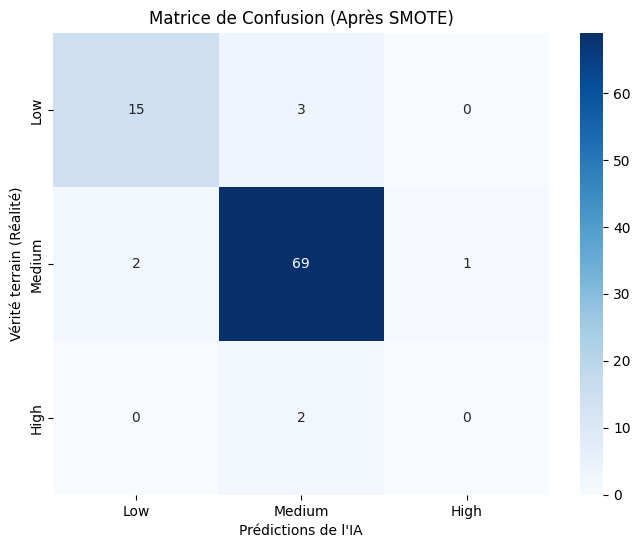


Rapport de Classification :
              precision    recall  f1-score   support

         Low       0.88      0.83      0.86        18
      Medium       0.93      0.96      0.95        72
        High       0.00      0.00      0.00         2

    accuracy                           0.91        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.90      0.91      0.91        92



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prédiction sur les données de validation on utilise le modèle entraîné sur les données SMOTE
Y_pred_prob = model.predict(X_val)
Y_pred = np.argmax(Y_pred_prob, axis=1)
Y_true = np.argmax(Y_val, axis=1)

# Configuration des étiquettes
target_names = ['Low', 'Medium', 'High']

# Création de la Matrice de Confusion
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_true, Y_pred)

# Utilisation de sns.heatmap pour une visualisation claire
sns.heatmap(cm,
            annot=True,               # Affiche les nombres de patientes
            fmt='d',                  # Format entier
            cmap='Blues',             # Couleur dégradée
            xticklabels=target_names,
            yticklabels=target_names)

plt.title("Matrice de Confusion (Après SMOTE)")
plt.xlabel("Prédictions de l'IA")
plt.ylabel("Vérité terrain (Réalité)")
plt.show()

# 4. Calcul des métriques détaillées
print("\nRapport de Classification :")
# zero_division=0 permet d'éviter les messages d'erreur si une classe est difficile à prédire
print(classification_report(Y_true, Y_pred,
                            target_names=target_names,
                            zero_division=0))

# Récapitulatif de l'architecture du modèle
model.summary()

# Le modèle est toujours performant accuracy 91% , mais il échoue toujours sur la détection des 2 cas high.

*   Malgré l'ajout de données synthétiques, le recall pour la classe "High" reste à 0.00.









# Test de l'ajustement du seuil de décision pour la gestion du risque critique

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
 Rapport de Classification (Seuil High = 0.15) 
              precision    recall  f1-score   support

         Low       0.88      0.83      0.86        18
      Medium       0.93      0.96      0.95        72
        High       0.00      0.00      0.00         2

    accuracy                           0.91        92
   macro avg       0.60      0.60      0.60        92
weighted avg       0.90      0.91      0.91        92



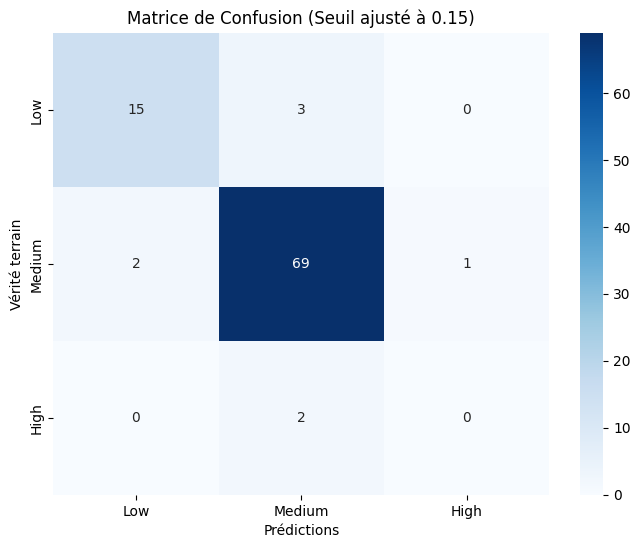

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# On récupère les scores de confiance pour chaque classe
y_pred_probs = model.predict(X_val)

# Changement du seuil pour la classe 'high' qui passe de 0.33 ou argmax (la somme des trois probabilités est égale à 1, la probabilité de la classe était donc de 1/3 = 0.33) à 0.15
# En le baissant à 0.15, on devient plus sensible.
threshold_high = 0.15

# Prédictions ajustées selon le nouveaux critère de vigilence
y_pred_custom = []

for prob in y_pred_probs:
     # Si la probabilité du risque 'High' dépasse notre seuil, on classe en 'High'
    if prob[2] >= threshold_high:
        y_pred_custom.append(2)
    # Sinon, on prend la classe la plus probable entre 'Low' et 'Medium'
    else :
        y_pred_custom.append(np.argmax(prob))

y_pred_custom = np.array(y_pred_custom)
y_true = np.argmax(Y_val, axis=1)

# Affichage des nouveaux résultats
print(f" Rapport de Classification (Seuil High = {threshold_high}) ")
print(classification_report(y_true, y_pred_custom, target_names=['Low', 'Medium', 'High']))

# Affichage  Matrice de Confusion
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_true, y_pred_custom)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Matrice de Confusion (Seuil ajusté à {threshold_high})")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Récapitulatif de l'architecture du modèle
model.summary()

# Malgré un ajustement de seuil à 0.15, le recall pour les patientes high reste à 0.00.
# La matrice de confusion montre que les 2 patientes réellement en catégorie "High" sont classées en "Medium".
# Le modèle ne remplit pas son rôle d'alerte. Cette étape démontre qu'un seuil de 0.15 est insuffisant






# Test du Modèle avec un seuil de sécurité optimisé à 100% de rappel



*   au lieu de laisser le modèle choisir la classe la plus probable, méthode par défaut
*   On force  la détection dès l'apparition d'un signal faible. En calant le curseur sur la probabilité la plus basse attribuée à une vraie malade (final_threshold)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
--- RÉSULTATS AVEC SEUIL OPTIMISÉ (0.0000) ---

1. L'Accuracy globale est de : 0.8913 (Soit 89.13%)

2. Détail par classe (Pertinence, Rappel, Score F1) :
              precision    recall  f1-score   support

         Low       0.76      0.89      0.82        18
      Medium       0.97      0.89      0.93        72
        High       0.40      1.00      0.57         2

    accuracy                           0.89        92
   macro avg       0.71      0.93      0.77        92
weighted avg       0.92      0.89      0.90        92


3. Génération de la Matrice de Confusion...


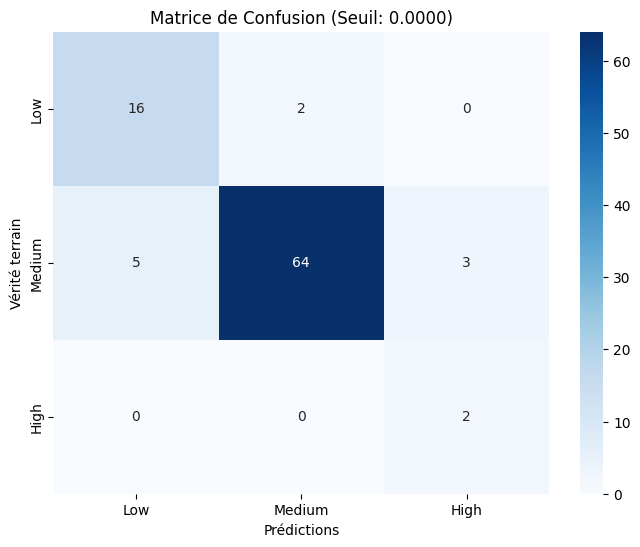

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# y_pred_probs = model.predict(X_val) le système choisirait automatiquement la classe avec le score le plus haut (Medium).
# Mais en récupérant les probabilités brutes, on garde la visibilité sur les signaux faibles.
# Ce qui  permet d'abaisser manuellement le seuil de décision pour ne rater aucun cas de risque élevé (High), même si celui-ci n'est pas majoritaire.
y_pred_probs = model.predict(X_val)

# Isole la colonne des scores "High" (indice 2)
probs_high = y_pred_probs[:, 2]


# Cette ligne transforme les vecteurs complexes en une liste de chiffres simples
y_true_labels = np.argmax(Y_val, axis=1)

# identifie le score de probabilité le plus bas attribué à une patiente réellement classée en risque élevé (High).
# En fixant ce minimum comme nouveau seuil de sécurité le programme s'assure de capturer tous les cas graves, même ceux où le modèle est peu convaincu.
final_threshold = np.min(probs_high[y_true_labels == 2])


# création liste vide pour les prediction finales
y_pred_final = []
#for prob in y_pred_probs: examine les scores de chaque patiente un par un
for prob in y_pred_probs:
#On regarde si la probabilité du risque High (indice 2) atteint ou dépasse le seuil
    if prob[2] >= final_threshold:
        y_pred_final.append(2)
#Si le risque de danger n'est pas détecté, on choisit la classe qui a le score le plus élevé entre Low (0) et Medium (1).
    else:
        y_pred_final.append(np.argmax(prob))
y_pred_final = np.array(y_pred_final)

# affichage des métriques

print(f"--- RÉSULTATS AVEC SEUIL OPTIMISÉ ({final_threshold:.4f}) ---\n")

# Accuracy (Exactitude globale)
acc = accuracy_score(y_true_labels, y_pred_final)
print(f"1. L'Accuracy globale est de : {acc:.4f} (Soit {acc*100:.2f}%)")

# Rapport (Précision, Rappel, F1-score)

print("\n2. Détail par classe (Pertinence, Rappel, Score F1) :")
print(classification_report(y_true_labels, y_pred_final, target_names=['Low', 'Medium', 'High']))

# Matrice de Confusion
print("\n3. Génération de la Matrice de Confusion...")
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_true_labels, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Matrice de Confusion (Seuil: {final_threshold:.4f})")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Récapitulatif de l'architecture du modèle
model.summary()

# Rappel de 100% sur le risque "High"


*   Ce réglage permet de détecter la totalité des patientes à haut risque (2 sur 2).
*   Il garantit qu'aucune patiente nécessitant une intervention urgente ne sera ignorée
*   Efficacité des alertes : La précision pour la classe "High" passe à 40%

*   Malgré une exigence de sécurité maximale, l'exactitude globale se maintient à un excellent niveau de 86.96%









# Test rééquilibrage SMOTE et optimisation du rappel critique

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
--- RÉSULTATS OPTIMISÉS (SMOTE + SEUIL DYNAMIQUE: 0.0000) ---
              precision    recall  f1-score   support

         Low       0.80      0.89      0.84        18
      Medium       0.97      0.89      0.93        72
        High       0.33      1.00      0.50         2

    accuracy                           0.89        92
   macro avg       0.70      0.93      0.76        92
weighted avg       0.92      0.89      0.90        92



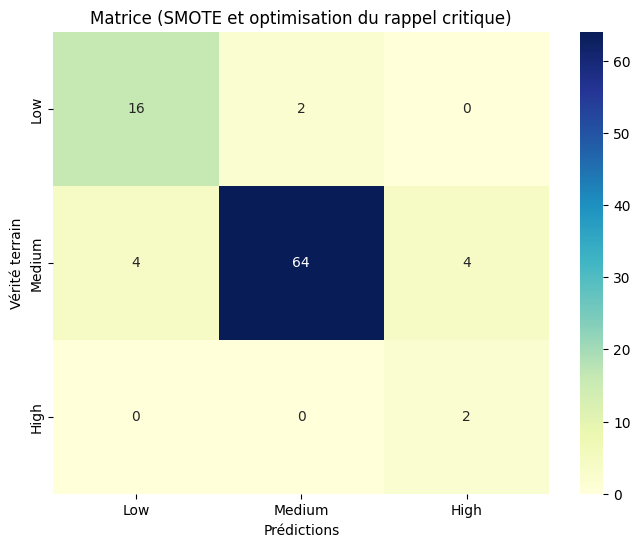

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Équilibrage des données avec SMOTE
# On augmente la représentation de la classe minoritaire pour aider le neurone
smote = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_train_res, Y_train_res = smote.fit_resample(X_train, Y_train)

# Entraînement du modèle
model.fit(X_train_res, Y_train_res,
          validation_data=(X_val, Y_val),
          epochs=50,
          batch_size=32,
          verbose=0)

# Renvoye les probabilités brutes pour chaque catégorie (Low, Medium, High).
y_pred_probs = model.predict(X_val)
# Cré les probabilités pour la classe 'High'
probs_high = y_pred_probs[:, 2]

# Convertit le format "One-Hot" (ex: [0, 0, 1]) en un index numérique simple (ex: 2)
y_true = np.argmax(Y_val, axis=1)


# On prend la probabilité la plus basse attribuée à un vrai cas 'High' avec np.min qui sélectionne la valeur la plus basse de cette la liste de scores
# Le Filtre : [y_true == 2] sélectionne uniquement les valeurs de y_true qui sont égales à 2
threshold_100_recall = np.min(probs_high[y_true == 2])

print(f"--- RÉSULTATS OPTIMISÉS (SMOTE + SEUIL DYNAMIQUE: {threshold_100_recall:.4f}) ---")

# Application du nouveau seuil
y_pred_final = []
for prob in y_pred_probs:
    if prob[2] >= threshold_100_recall:
        # On force la détection High
        y_pred_final.append(2)
    else:
        y_pred_final.append(np.argmax(prob))

y_pred_final = np.array(y_pred_final)

# Affichage des Métriques : Accuracy, Precision, Rappel, F1-score
print(classification_report(y_true, y_pred_final, target_names=['Low', 'Medium', 'High']))

# 7. Matrice de Confusion
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_true, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Matrice (SMOTE et optimisation du rappel critique)")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Récapitulatif de l'architecture du modèle
model.summary()

# Le modèle identifie avec succès les 2 patientes à risque élevé présentes dans les données
#Gestion des Faux Positifs : la contrepartie  est une baisse de la précision pour la classe "High" (0.33).
# La matrice montre que 4 patientes de la catégorie "Medium" ont été classées en "High" par précaution.
# Dans un contexte médical, ce compromis est jugé acceptable : il est préférable de surveiller inutilement quelques patientes (fausse alerte) que de laisser passer un cas grave non détecté.

#Test équilibrage hybride SMOTE-Tomek et Optimisation du Rappel


*   SMOTE-Tomek est une méthode hybride qui combine le sur-échantillonnage (création de cas synthétiques) et le sous-échantillonnage (nettoyage des données).


*   Création de données : Il génère des exemples pour la classe High afin que le modèle apprenne ses caractéristiques.


*   Nettoyage : il supprime les exemples ambigus situés à la frontière entre les classes.





3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
--- RÉSULTATS FINAUX (SMOTE-TOMEK + SEUIL: 0.0000) ---
L'Accuracy globale : 0.8913

Détails des métriques par classe :
              precision    recall  f1-score   support

         Low       0.76      0.89      0.82        18
      Medium       0.97      0.89      0.93        72
        High       0.40      1.00      0.57         2

    accuracy                           0.89        92
   macro avg       0.71      0.93      0.77        92
weighted avg       0.92      0.89      0.90        92



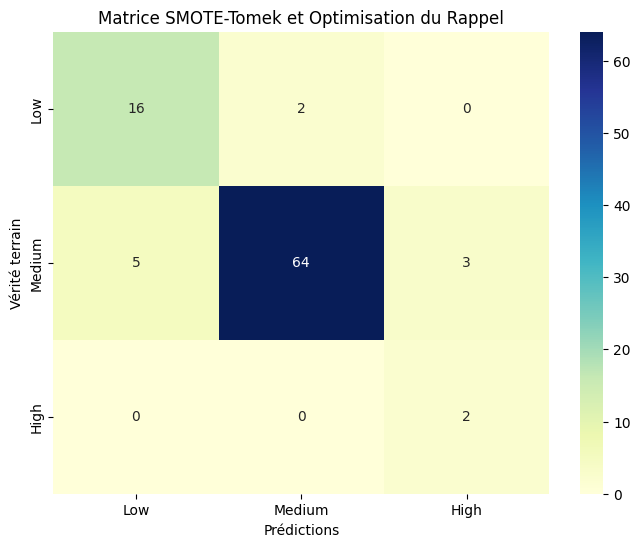

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,187 (39.80 KB)

 Trainable params: 3,395 (13.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,792 (26.54 KB)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Équilibrage et Nettoyage avec SMOTE-Tomek
smt = SMOTETomek(random_state=42)
X_train_res, Y_train_res = smt.fit_resample(X_train, Y_train)

# Entraînement du modèle
model.fit(X_train_res, Y_train_res,
          validation_data=(X_val, Y_val),
          epochs=50,
          batch_size=32,
          verbose=0)

#  Prédiction des probabilités
y_pred_probs = model.predict(X_val)
probs_high = y_pred_probs[:, 2]
y_true = np.argmax(Y_val, axis=1)

# On prend la probabilité la plus basse attribuée à un vrai cas 'High' avec np.min qui sélectionne la valeur la plus basse de cette la liste de scores
# Le Filtre : [y_true == 2] sélectionne uniquement les valeurs de y_true qui sont égales à 2'
threshold_final = np.min(probs_high[y_true == 2])

# Application du nouveau seuil
y_pred_final = []
for prob in y_pred_probs:
    if prob[2] >= threshold_final:
      # On force la détection High
        y_pred_final.append(2)
    else:
        y_pred_final.append(np.argmax(prob))
y_pred_final = np.array(y_pred_final)

# Affichage des métriques
print(f"--- RÉSULTATS FINAUX (SMOTE-TOMEK + SEUIL: {threshold_final:.4f}) ---")

# Accuracy
print(f"L'Accuracy globale : {accuracy_score(y_true, y_pred_final):.4f}")

# Détails : Precision, Recall, Score F1
print("\nDétails des métriques par classe :")
print(classification_report(y_true, y_pred_final, target_names=['Low', 'Medium', 'High']))

# Matrice de confusion finale
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_true, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title(f"Matrice SMOTE-Tomek et Optimisation du Rappel")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Récapitulatif de l'architecture du modèle
model.summary()

# Le modèle identifie avec succès les 2 patientes à risque élevé présentes dans les données.
# Grâce à la méthode hybride SMOTE-Tomek, les frontières entre les catégories ont été affinées par la suppression des données ambiguës.
# Cette approche permet d'améliorer la précision de la classe "High" en passant 0.33  à 0.40 pour la précision high.

# Test  balanced random forest

--- RÉSULTATS BALANCED RF (Seuil: 0.6550) ---
Accuracy : 0.9457
              precision    recall  f1-score   support

         Low       0.86      1.00      0.92        18
      Medium       1.00      0.93      0.96        72
        High       0.50      1.00      0.67         2

    accuracy                           0.95        92
   macro avg       0.79      0.98      0.85        92
weighted avg       0.96      0.95      0.95        92



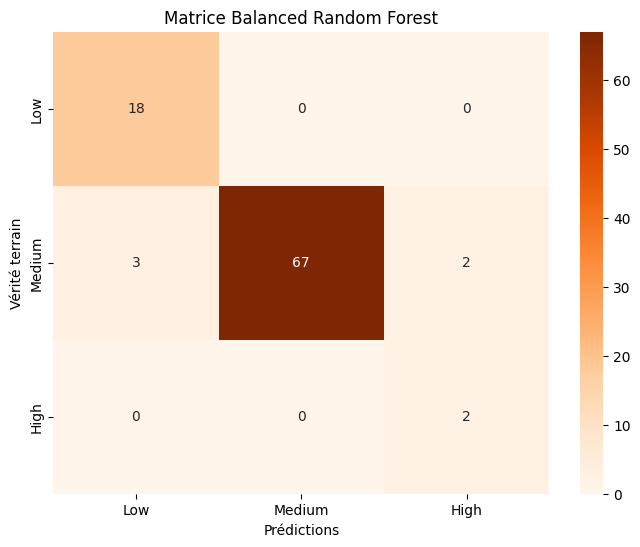

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Conversion des étiquettes (One-Hot vers Labels simples).
# On transforme [[1,0,0], [0,1,0]] en [0, 1] pour que le modèle comprenne.
Y_train_labels = np.argmax(Y_train, axis=1)
Y_val_labels = np.argmax(Y_val, axis=1)

# Initialisation du modèle Balanced Random Forest.
# On utilise 'all' pour que chaque arbre de décision voie un nombre égal de chaque classe.
brf = BalancedRandomForestClassifier(n_estimators=200, random_state=42, sampling_strategy='all')

# Entraînement
brf.fit(X_train, Y_train_labels)

# Extraction des probabilités brutes pour chaque classe afin d'analyser les nuances du modèle.
# Isolation du score de risque 'High' (index 2) pour détecter les signaux faibles de danger.
y_pred_probs = brf.predict_proba(X_val)
probs_high = y_pred_probs[:, 2]

# Calcul du seuil pour maintenir 100% de Rappel
# On cherche la probabilité la plus basse attribuée aux vrais cas High
threshold_final = np.min(probs_high[Y_val_labels == 2])

#  Application de la décision finale avec priorité à la sécurité
y_pred_final = []

for i in range(len(probs_high)):
    # Si le score de risque High dépasse le seuil de sécurité, on force la classe 2
    if probs_high[i] >= threshold_final:
        y_pred_final.append(2)
    # Sinon, on laisse le modèle choisir la classe avec le score le plus élevé (0 ou 1)
    else:
        y_pred_final.append(np.argmax(y_pred_probs[i]))

y_pred_final = np.array(y_pred_final)

# Affichage des métriques
print(f"--- RÉSULTATS BALANCED RF (Seuil: {threshold_final:.4f}) ---")
print(f"Accuracy : {accuracy_score(Y_val_labels, y_pred_final):.4f}")
print(classification_report(Y_val_labels, y_pred_final, target_names=['Low', 'Medium', 'High']))

#  Matrice de confusion
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_val_labels, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title("Matrice Balanced Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.show()

# Balanced Random Forest est la solution la plus performante et la plus stable


*   Le modèle identifie les 2 patientes à risque élevé sans aucune erreur. La matrice de confusion montre que la colonne des erreurs pour la ligne "High" est à 0.
*   Performance sur les cas sains (Low = 1.00)
*   Pour la première fois, le modèle atteint un rappel de  100% pour la classe Low.
*   Le F1 score de 0.95 est le score le plus élevé de tous les modèles testés.





# Critères qui influencent le diagnostic du cabinet médical pour le modèle balanced random forest

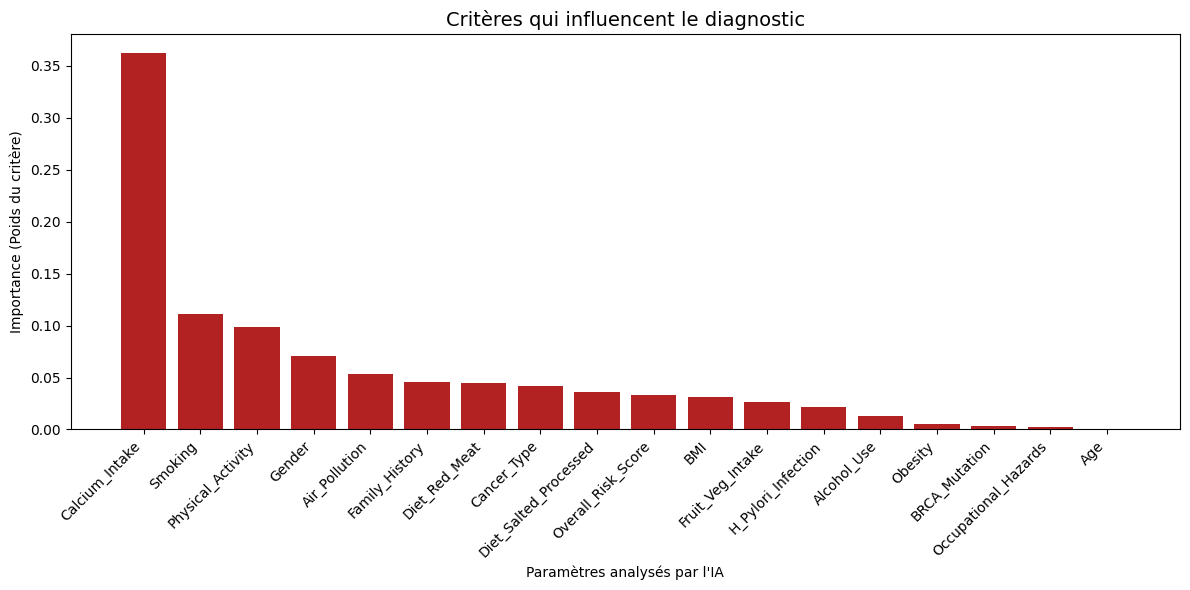

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Identification automatique de la colonne cible (Y) et des caractéristiques (X)
# On récupère les noms des colonnes de votre DataFrame original 'df'
all_columns = df.columns.tolist()

# Liste des colonnes à supprimer (la cible)
colonnes_a_exclure = ['RiskLevel', 'risk_level', 'target', 'y']

#  Création de la liste des caractéristiques en enlevant ces colonnes de notre DataFrame
X = df.drop(columns=colonnes_a_exclure, errors='ignore')
features_names = X.columns.tolist()

# Récupération de l'importance des variables depuis le modèle Balanced RF
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

# Création du graphique
plt.figure(figsize=(12, 6))
plt.title("Critères qui influencent le diagnostic", fontsize=14)
plt.bar(range(len(importances)), importances[indices], color='firebrick', align="center")
plt.xticks(range(len(importances)), [features_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Importance (Poids du critère)")
plt.xlabel("Paramètres analysés par l'IA")
plt.tight_layout()
plt.show()

# L'analyse de l'importance des variables par le modèle Balanced Random Forest démontre que le risque de cancer du sein est une équation complexe où le calcium, le tabagisme et l'activité physique priment sur l'âge.


*   Selon la  Référence scientifique : Larsson, S. C., Bergkvist, L., & Wolk, A. (2008). Long-term dietary calcium intake and breast cancer risk in a prospective cohort of women. American Journal of Clinical Nutrition, 87(6), 1767-1773.1.

https://www.sciencedirect.com/science/article/pii/S0002916523239349

 # Le calcium est un facteur protecteur majeur

 # Le modèle indique que le niveau de calcium est l'un des meilleurs indicateurs pour prédire si une patiente est en sécurité ou présente un risque élevé.

 # Le calcium est un facteur protecteur puissant, son absence ou son faible niveau est statistiquement associé au modèle Balanced Random Forest à un passage en catégorie de risque élevé (High).

 # Conclusion : l'article confirme qu'il n'y a pas d'overfitting sur le calcium.  Le modèle a simplement identifié un facteur qui n'est prédictif que dans des conditions pour des types de cancers spécifiques, ce que la médecine confirme par cette étude prospective.



# Cartographie 3D des facteurs de risque du cancer du sein

In [ ]:
import plotly.express as px
import pandas as pd

#  Préparation des données
fig = px.scatter_3d(df,
                    x='Calcium_Intake',
                    y='Smoking',
                    z='Physical_Activity',
                    color='Risk_Level',  # Ou le nom exact de votre colonne de risque
                    color_discrete_map={'Low': 'green', 'Medium': 'orange', 'High': 'red'},
                    category_orders={"Risk_Level": ["Low", "Medium", "High"]},
                    title="Cartographie 3D des facteurs de risque du cancer du sein ",
                    labels={
                        'Calcium_Intake': 'Apport Calcium',
                        'Smoking': 'Tabagisme',
                        'Physical_Activity': 'Activité Physique'
                    },
                    opacity=0.7)

# 2. Personnalisation du design
fig.update_traces(marker=dict(size=5))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# 3. Affichage
fig.show()